In [1]:
import numpy as np

from scipy.stats import multivariate_normal

import matplotlib
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage{color}')

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["image.cmap"] = "Blues"

In [2]:
def kernel(house1, house2):
    """
    not vectorized
    """
    house1 = house1.flatten()
    house2 = house2.flatten()
    
    # different # stories
    if house1[1] != house2[1]:
        return 0
    
    return 1 - np.abs(house1[0] - house2[0]) / 1000


def parallel_coor_plot(mu, Sigma, labels=None):
    mvn = multivariate_normal(mu, Sigma)

    np.random.seed(0)
    samples = mvn.rvs(size=10)

    xs = np.arange(mu.shape[0])

    sd = np.sqrt(np.diagonal(Sigma))
    lower = mu - 1.96 * sd
    upper = mu + 1.96 * sd

    plt.figure(figsize=(8, 6))

    plt.errorbar(
        xs,
        mu,
        yerr=1.96 * sd,
        fmt="D-",
        markersize=15,
        capsize=10,
        elinewidth=4,
        capthick=4,
        label="95\% CI",
    )

    plt.plot(xs, samples[0, :], alpha=0.3, marker="D", markersize=10, label="sample")

    for i in range(1, samples.shape[0]):
        plt.plot(xs, samples[i, :], marker="D", markersize=10, alpha=0.3)
    
    if labels is not None:
        plt.xticks(ticks=list(range(mu.size)), labels=labels, fontsize=15)

    plt.legend(fontsize=15)

    plt.show()
    
    
def box_plot(mu, Sigma, labels=None):
    mvn = multivariate_normal(mu, Sigma)

    np.random.seed(0)
    samples = mvn.rvs(size=1000)
    
    plt.figure(figsize=(8, 6))
    
    plt.boxplot(samples)
    
    if labels is not None:
        plt.xticks(ticks=list(range(1, mu.size + 1)), labels=labels, fontsize=15)
        
    plt.show()

# 3 houses

In [3]:
# features: living area, # stories
houses = np.array(
    [
        [1000, 2],
        [1100, 2],
        [9000, 10]
    ]
)

mean = np.zeros(houses.shape[0])
K = np.empty((houses.shape[0], houses.shape[0]))

for i in range(houses.shape[0]):
    for j in range(houses.shape[0]):
        K[i, j] = kernel(houses[i, :], houses[j, :])
        
K  # doesn't contain the features anymore!

array([[1. , 0.9, 0. ],
       [0.9, 1. , 0. ],
       [0. , 0. , 1. ]])

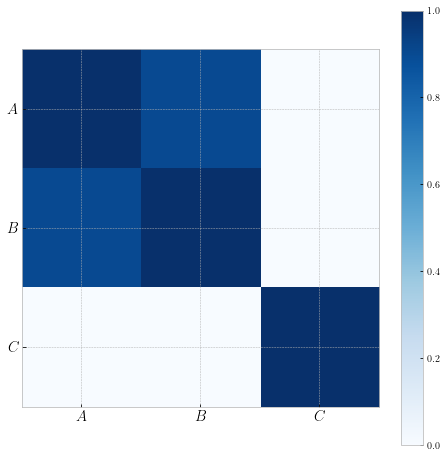

In [4]:
plt.figure(figsize=(8, 8))

plt.imshow(K)
plt.colorbar()

plt.xticks(ticks=[0, 1, 2], labels=[r"$A$", r"$B$", r"$C$"], fontsize=15)
plt.yticks(ticks=[0, 1, 2], labels=[r"$A$", r"$B$", r"$C$"], fontsize=15)

plt.show()

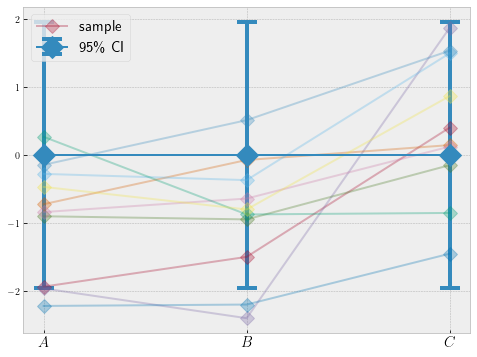

In [5]:
parallel_coor_plot(mean, K, labels=[r"$A$", r"$B$", r"$C$"])  # same x-axis as the heat map

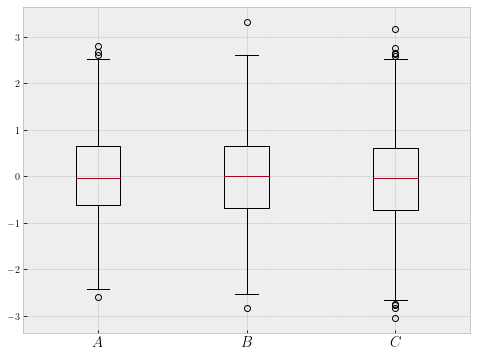

In [6]:
box_plot(mean, K, labels=[r"$A$", r"$B$", r"$C$"])  # same x-axis as the heat map

# 20 houses

In [7]:
# features: living area, # stories
houses = np.array([[1000 + i * 50, 2] for i in range(1, 21)])

houses

array([[1050,    2],
       [1100,    2],
       [1150,    2],
       [1200,    2],
       [1250,    2],
       [1300,    2],
       [1350,    2],
       [1400,    2],
       [1450,    2],
       [1500,    2],
       [1550,    2],
       [1600,    2],
       [1650,    2],
       [1700,    2],
       [1750,    2],
       [1800,    2],
       [1850,    2],
       [1900,    2],
       [1950,    2],
       [2000,    2]])

In [8]:
mean = np.zeros(houses.shape[0])
K = np.empty((houses.shape[0], houses.shape[0]))

for i in range(houses.shape[0]):
    for j in range(houses.shape[0]):
        K[i, j] = kernel(houses[i, :], houses[j, :])
        
K  # doesn't contain the features anymore!

array([[1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 ,
        0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05],
       [0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55,
        0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 ],
       [0.9 , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 ,
        0.55, 0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15],
       [0.85, 0.9 , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65,
        0.6 , 0.55, 0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 ],
       [0.8 , 0.85, 0.9 , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 ,
        0.65, 0.6 , 0.55, 0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25],
       [0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75,
        0.7 , 0.65, 0.6 , 0.55, 0.5 , 0.45, 0.4 , 0.35, 0.3 ],
       [0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 ,
        0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 , 0.45, 0.4 , 0.35],
       [0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9

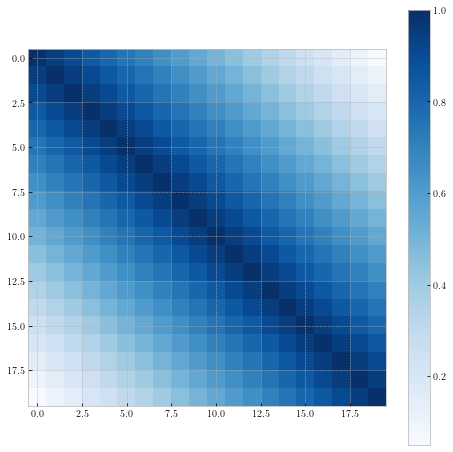

In [9]:
plt.figure(figsize=(8, 8))

plt.imshow(K)
plt.colorbar()

plt.show()

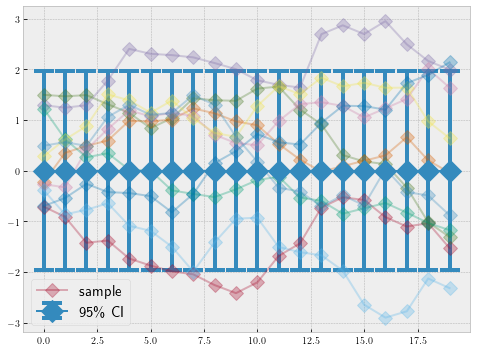

In [10]:
parallel_coor_plot(mean, K)  # same x-axis as the heat map

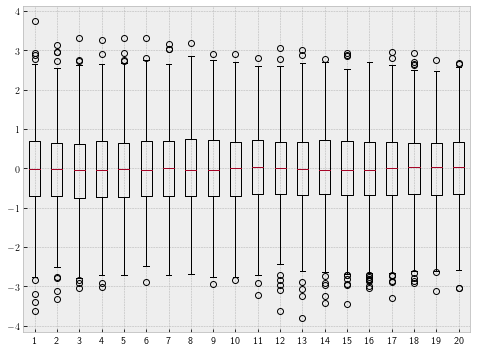

In [11]:
box_plot(mean, K)  # same x-axis as the heat map